In [2]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the handwritten digits dataset from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
print(len(X_train))
# So we have 60,000 handwritten digits in the training data

print(len(X_test))
# And 10,000 handwritten digits in the testing data

60000
10000


In [8]:
X_train[0]
# this gives a 2D array (28x28) with values from 0 to 255, where 0 representing black and 255 representing white.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

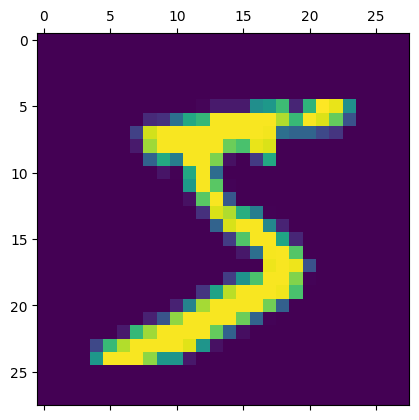

In [10]:
plt.matshow(X_train[0])

In [18]:
# we scale the dataset inorder to make the data more robust and the model can generate high accuracy scores.
X_train = X_train/255
X_test = X_test/255

In [19]:
# we need to flatten the data as we have to convert the 28x28 grid into a 1D array that contains 784 elements.
# to do this, we use the reshape() method provided by the pandas library
X_train_flattened = X_train.reshape(len(X_train), 28*28)

In [20]:
X_train_flattened.shape

(60000, 784)

In [21]:
# Similarly, we flatten the X_test data
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

In [22]:
X_train_flattened[0]
# the data is in 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
# now we build a simple neural network which will take the X_train_flattened data as input and try to predict which digit is it.
# to this, we have keras library
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4759 - accuracy: 0.8742
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3047 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9257


In [24]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9270


[0.2657182514667511, 0.9269999861717224]

In [27]:
y_pred = model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_pred[0]

array([2.4293408e-02, 4.2777538e-07, 7.9091065e-02, 9.4369048e-01,
       2.4350283e-03, 1.0389590e-01, 2.0694449e-06, 9.9977708e-01,
       8.8148348e-02, 6.2399065e-01], dtype=float32)